<a href="https://colab.research.google.com/github/RaviKcse08/datascience_projs/blob/main/DecisionTreeVsRandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from pprint import pprint

In [14]:
#read bank marketing csv
sd = pd.read_csv('default_of_credit_card_clients.csv')

sd.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247,3848,3151,5818,15,9102,17,3165,1395,0
1,20000,2,2,2,31,1,5,4,4,3,...,20835,20219,20487,0,1000,0,0,760,0,0
2,220000,1,1,2,24,0,0,0,-1,-1,...,8303,0,85632,5000,5050,8303,0,85632,0,0
3,210000,2,1,1,38,1,-2,-1,0,-1,...,123,789,1222,0,250,0,789,1222,9616,1
4,30000,1,3,1,42,-1,-1,-1,-1,-1,...,240,1320,780,390,390,240,1470,0,0,0


In [17]:
train_df, test_df = train_test_split(sd, test_size=.25)
train_df.columns

#data = train_df.values
#data[:5]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
feature_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23']
X = sd[feature_cols] # Features
Y = sd['Y'] # Target variable

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function


clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.812137290664898


In [34]:
from sklearn.ensemble import RandomForestClassifier

classfier = RandomForestClassifier(n_estimators=20, criterion='entropy',max_depth=5)

classfier.fit(X_train,y_train)
y_pred_t = classfier.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Random Forest - Accuracy:",metrics.accuracy_score(y_test, y_pred_t))
print("Decision Tree - Accuracy:",metrics.accuracy_score(y_test, y_pred))





Random Forest - Accuracy: 0.8076604211573537
Decision Tree - Accuracy: 0.812137290664898


In [40]:

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred_t)

array([[4401,  203],
       [ 957,  470]])

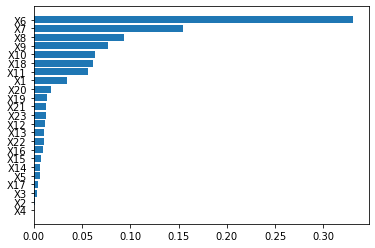

In [42]:
#feature importance
dfimp = pd.DataFrame({'feature': X_train.columns.values, 'importance':classfier.feature_importances_})
df_ordered = dfimp.sort_values(by='importance')

height = df_ordered['importance']
bars = df_ordered['feature']
y_pos = np.arange(len(bars))


plt.barh(y_pos,height)
plt.yticks(y_pos,bars)
plt.show()
     